In [1]:
#Importing 
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage import util 

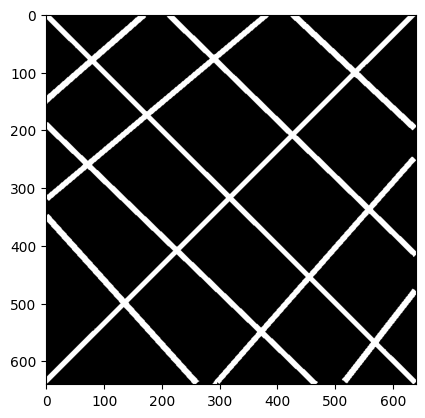

In [2]:
#Reading image
img_org = util.invert(imread("lines.png", as_gray = True))
#Showing image
plt.imshow(img_org, cmap = "gray")
plt.show()

In [3]:
#A class for Structuring elements (fr : Element structurant)
#It has matrix named structuring_element and an array of size 2 named origin_coordinate
#structuring_element -> Matrix that is used in mm(mathematical morphology)
#origin_coordinate -> origin of the matrix (used in mm calculations)
class StructuringElement():
    
    def __init__(self, structuring_element, origin_coordinate):
        self.structuring_element = structuring_element
        self.origin_coordinate = origin_coordinate

    def set(self, structuring_element, origin_coordinate):
        self.structuring_element = structuring_element
        self.origin_coordinate = origin_coordinate

    def get(self):
        return self.structuring_element, self.origin_coordinate

#Mathematical Morphology Class
# Contains 4 staple method of mm : Dilatation, Erosion, Opening and Closing 
class MathematicalMorphology():
    def __init__(self, structuring_element):
        self.structuring_element = structuring_element
    
    #Dilatation Method
    #Parameter : image -> image that we want to apply dilatation
    def Dilatation(self, image):
        #Getting Structuring element
        structuring_element, origin = self.structuring_element.get()
        
        #Creating Result matrix
        result = np.zeros(np.add(image.shape,structuring_element.shape))

        #Dilatation Calculation
        for i in range(image.shape[0] - origin[0]):
            for j in range(image.shape[1]-  origin[1]):
                if image[i, j] != 0:
                    result[i + origin[0]: i + origin[0] + structuring_element.shape[0],
                            j + origin[1]: j + origin[1] + structuring_element.shape[1]] = np.maximum(
                            result[i + origin[0]: i + origin[0] + structuring_element.shape[0] , j + origin[1]: j + origin[1] + structuring_element.shape[1]], 
                            structuring_element)
        #returning the result 
        return result[origin[0] : -(structuring_element.shape[0] - origin[0]), origin[1] : -(structuring_element.shape[1] - origin[1])]
    
    #Erosion Method
    #Parameter : image -> image that we want to apply erosion
    # calculates erosion with dual :  erosion = invert(dilatation(invert(image)))
    def Erosion(self, image):
        #Getting Structuring element
        structuring_element, origin = self.structuring_element.get()

        #Creating Result matrix
        result = np.zeros(np.add(image.shape,structuring_element.shape))

        
        image = util.invert(image)

        for i in range(image.shape[0] - origin[0]):
            for j in range(image.shape[1] - origin[1]):
                if image[i, j] != 0:
                    result[i + origin[0]: i + origin[0] + structuring_element.shape[0],
                            j + origin[1]: j + origin[1] + structuring_element.shape[1]] = np.maximum(
                            result[i + origin[0]: i + origin[0] + structuring_element.shape[0] , j + origin[1]: j + origin[1] + structuring_element.shape[1]], 
                            structuring_element)

        return util.invert(result[origin[0] : -(structuring_element.shape[0] - origin[0]), origin[1] : -(structuring_element.shape[1] - origin[1])])

    #Opening Method
    #Parameter : image -> image that we want to apply opening
    # calculates opening using Erosion-Dilatation : opening = dilatation(erosion(image))
    def Opening(self, image):
        return self.Dilatation(self.Erosion(image))
    
    #Closing Method
    #Parameter : image -> image that we want to apply closing
    # calculates closing using Erosion-Dilatation : opening = erosion(dilatation(image))
    def Closing(self, image):
        return self.Erosion(self.Dilatation(image))


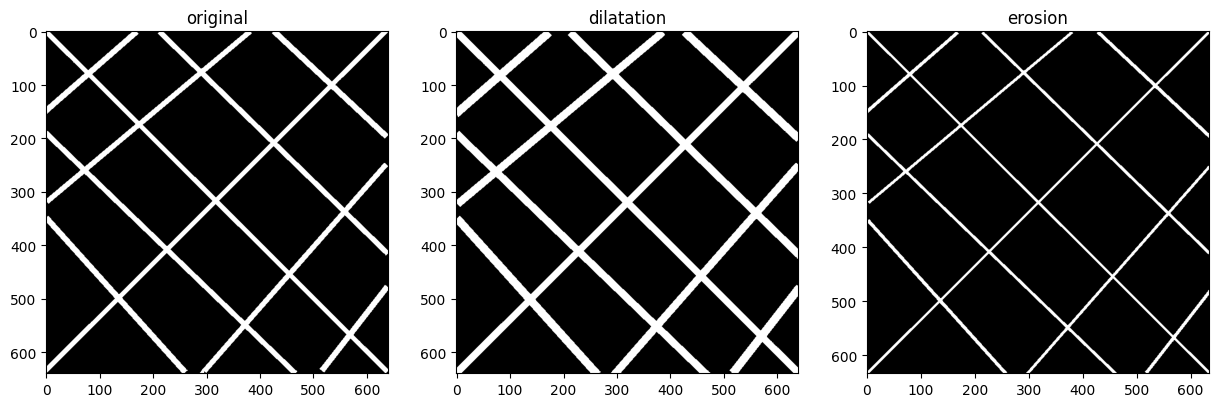

In [4]:
#Erosion and Dilatation Test
#defining structuring element
se_element = np.matrix([ [0., 0., 0., 1., 0., 0., 0.],
                         [0., 0., 0., 1., 0., 0., 0.],
                         [0., 0., 0., 1., 0., 0., 0.],
                         [1., 1., 1., 1., 1., 1., 1.],
                         [0., 0., 0., 1., 0., 0., 0.],
                         [0., 0., 0., 1., 0., 0., 0.],
                         [0., 0., 0., 1., 0., 0., 0.]])  
se_origin = np.array([3,3])

# Creating StructingElement instance to use in MathematicalMorphology
se = StructuringElement(se_element, se_origin)

# Creating MM 
mm = MathematicalMorphology(se)

# Applying dilatation and erosion
result_dilatation = mm.Dilatation(img_org)
result_erosion = mm.Erosion(img_org)

f, axis = plt.subplots(1,3, figsize=(15, 15)) 
axis[0].imshow(img_org, cmap="gray")
axis[0].set_title("original")
axis[1].imshow(result_dilatation,cmap="gray")
axis[1].set_title("dilatation")
axis[2].imshow(result_erosion[3:-3, 3:-3],cmap="gray")
axis[2].set_title("erosion")
plt.show()

#Results are correct

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


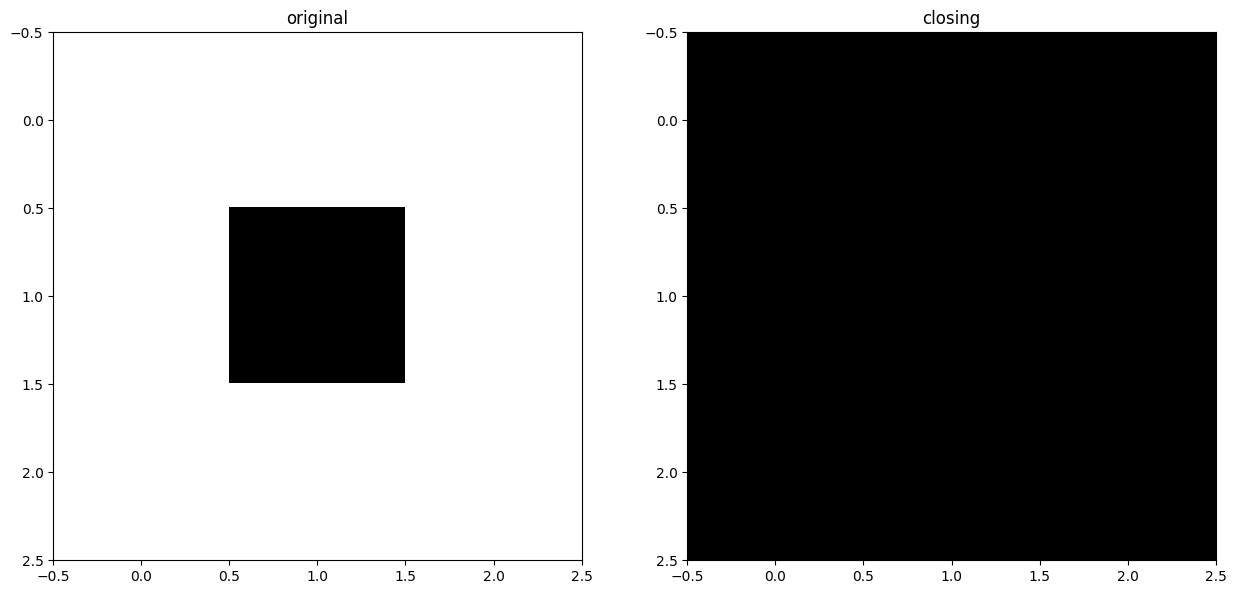

In [4]:
#Closing Test
#defining structuring element
se_origin = np.array([0,1])
se_element = np.matrix([[1., 1.]]) 

#test image
image_test_closing = np.matrix([[1., 1., 1.],
                                [1., 0., 1.],
                                [1., 1., 1.]])

# Creating StructingElement instance to use in MathematicalMorphology
se_closing = StructuringElement(se_element, se_origin)

# Creating MM 
mm = MathematicalMorphology(se_closing)

# Applying closing
result_closing = mm.Closing(image_test_closing)

# Displaying Closing Matrix
print(result_closing)

f, axis = plt.subplots(1,2, figsize=(15, 15)) 
axis[0].imshow(image_test_closing, cmap="gray")
axis[0].set_title("original")
axis[1].imshow(result_closing,cmap="gray")
axis[1].set_title("closing")
plt.show()

#Result is correct, the reason that the closing image is black instead of white is when an image has the same value for each pixel, imshow() shows it all black

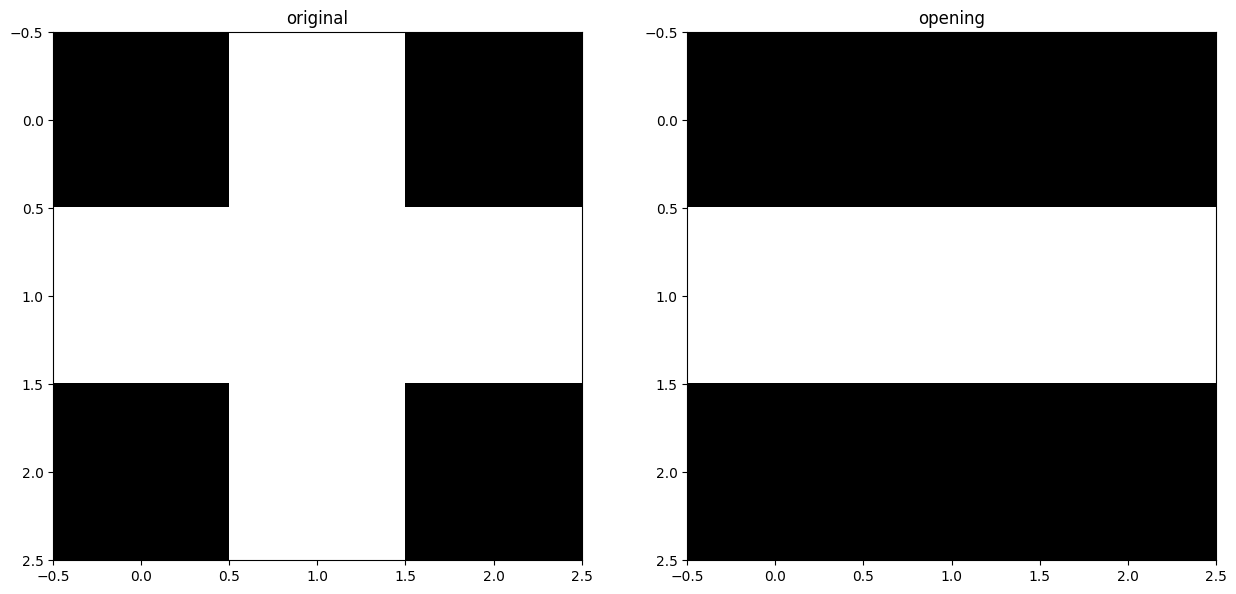

In [5]:
#Opening Test
#defining structuring element
se_origin = np.array([0,0])
se_element = np.matrix([[1., 1.]])  

#test image
image_test_opening = np.matrix([[0., 1., 0.],
                                [1., 1., 1.],
                                [0., 1., 0.]])  

# Creating StructingElement instance to use in MathematicalMorphology
se_opening = StructuringElement(se_element, se_origin)

# Creating MM 
mm = MathematicalMorphology(se_opening)

# Applying Opening
result_opening = mm.Opening(image_test_opening)

#Showing images
f, axis = plt.subplots(1,2, figsize=(15, 15)) 
axis[0].imshow(image_test_opening, cmap="gray")
axis[0].set_title("original")
axis[1].imshow(result_opening,cmap="gray")
axis[1].set_title("opening")
plt.show()

#Result is correct